- 해외는 요즘에 알고리즘 만드는걸 안함 -> 다 머신러닝 돌리면 알고리즘이 만들어지니까

# SVM(Support Vector Machine)
- 분류하기 위해 선을 그어줌
- Convergence(수렴하다)

### SVM을 활용한 비만도(BMI) 측정 예측
- BMI = 몸무게(kg) / 키(m) * 키(m)
- BMI가 18.5이상 25미만 일때가 표준 몸무게 입니다.

- 요즘 데이터 만드는 산업도 커지고 있대(딥러닝 때문에) 

In [50]:
# 데이터를 획득하기 위해 무작위로 2만명의 데이터를 생성
# 키(cm), 몸무게(kg), Label(저체중(thin), 정상체중(normal), 과체중(fat)) 의 csv 생성

import random

# 함수 만들기
# BMI를 계산해서 Lable을 return하는 함수(** -> 제곱)

def calc_bmi(h,w):
    bmi = w / (h/100) ** 2
    # return 이라서 elif, else 이런거 안해줘도 다시 돌아감
    if bmi < 18.5 : return "thin"
    if bmi < 25 : return "normal"
    return "fat"

# 저장 파일 준비하기
fp = open("../Data/bmi.csv",'w' ,encoding='utf-8')
fp.write("height,weight,label\r\n")

# 무작위로 데이터 생성하기(갯수 확인용)
# 스페이스바 주의!
cnt = {"thin":0, "normal":0, "fat":0}

for i in range(20000):
    # 정수로 120이상에서 200사이의 값을 받을꺼야
    h = random.randint(120,200)
    w = random.randint(35, 80)
    label = calc_bmi(h, w)
    cnt[label] += 1
    # 스페이스바 주의!
    fp.write("{0},{1},{2}\r\n".format(h,w,label))
fp.close()
print("ok :",cnt)

ok : {'thin': 6494, 'normal': 5913, 'fat': 7593}


## BMI공식을 사용하지 않고 BMI 예측

In [51]:
import pandas as pd

In [52]:
# 데이터 불러오기
tbl = pd.read_csv("../Data/bmi.csv")
tbl.head()


,height,weight,label
0,141,61,fat
1,132,54,fat
2,149,63,fat
3,190,47,thin
4,143,58,fat


In [53]:
# 컬럼을 분리하여 정규화 하기 (표준편차,min, max 이런값들으 차이가 많으면 해줘야하)
tbl.describe()

,height,weight
count,20000.000000,20000.000000
mean,160.135800,57.435100
std,23.412891,13.237388
min,120.000000,35.000000
25%,140.000000,46.000000
50%,160.000000,57.000000
75%,180.000000,69.000000
max,200.000000,80.000000


In [59]:
# 컬럼을 분리하여 정규화 하기
label = tbl['label']
w = tbl['weight'] / 80 # 데이터 받은 최대값이 80 이네
h = tbl['height'] / 200

In [60]:
data = pd.concat([w,h], axis=1)
data

,weight,height
0,0.7625,0.705
1,0.6750,0.660
2,0.7875,0.745
3,0.5875,0.950
4,0.7250,0.715
...,...,...
19995,0.5750,0.650
19996,0.8625,0.805
19997,0.4375,0.805
19998,0.7125,0.860


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
# 학습용과 훈련용으로 나누기
train_data, test_data, train_label, test_label = train_test_split(data, label)

In [63]:
from sklearn import svm,metrics
svm = svm.SVC()

In [64]:
# 데이터 학습하기
svm.fit(train_data, train_label)

SVC()

In [65]:
# 정확도 구하기
svm.score(test_data, test_label)

0.996

In [66]:
# 예측하기
pred = svm.predict(test_data)
pred

array(['normal', 'normal', 'normal', ..., 'thin', 'normal', 'thin'],
      dtype=object)

In [67]:
# Confusion Matrix 출력하기
bmi_report = metrics.classification_report(test_label,pred )
print(bmi_report)

              precision    recall  f1-score   support

         fat       1.00      1.00      1.00      1921
      normal       0.99      1.00      0.99      1494
        thin       1.00      0.99      1.00      1585

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [68]:
# 시각화 해보기 
import matplotlib.pyplot as plt
tbl.head()

,height,weight,label
0,141,61,fat
1,132,54,fat
2,149,63,fat
3,190,47,thin
4,143,58,fat


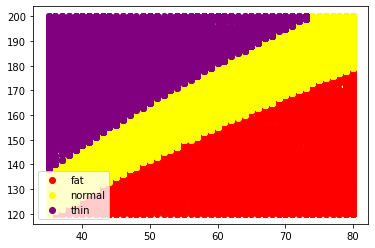

In [69]:
tbl = pd.read_csv("../Data/bmi.csv",index_col=2)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

def scatter(lbl,color):
    b = tbl.loc[lbl]
    ax.scatter(b['weight'],b['height'],c=color,label=lbl)

scatter("fat","red")
scatter("normal","yellow")
scatter("thin","purple")
ax.legend()
plt.savefig("../Data/bmi-test.png")
plt.show()

---
# SVM의 종류
- SVM(Classificaion)
- NuSVM : "
- LinearSVC : SVM중에서 가장 빠름, SVC대비 약 3배 빠름

In [70]:
from sklearn import svm

In [71]:
# 데이터 학습하기
clf = svm.LinearSVC()

In [72]:
# 데이터 학습하기
clf.fit(train_data, train_label)

LinearSVC()

In [73]:
clf.score(test_data, test_label)

0.9256

In [74]:
# 예측하기
pred = clf.predict(test_data)
pred

array(['normal', 'fat', 'thin', ..., 'thin', 'normal', 'thin'],
      dtype=object)

In [75]:
# Confusion Matrix 출력하기
bmi_report = metrics.classification_report(test_label,pred )
print(bmi_report)

              precision    recall  f1-score   support

         fat       0.91      1.00      0.95      1921
      normal       1.00      0.75      0.86      1494
        thin       0.90      1.00      0.95      1585

    accuracy                           0.93      5000
   macro avg       0.94      0.92      0.92      5000
weighted avg       0.93      0.93      0.92      5000



> 빨라지면서 정확도가 떨어졌지만 데이터가 더 많아지면 정확도는 비슷해짐